# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 1:00 pm**

Good Luck!!

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

## LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from jupyterthemes import jtplot
jtplot.style(theme="onedork", context="notebook", ticks=True, grid=True)

## IMPORT DATA

In [2]:
original = pd.read_csv("housing_prices.csv") #in case needed afterwards
houses = pd.read_csv("housing_prices.csv")
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## CLEANING

In [3]:
#check shape
houses.shape

(1460, 81)

In [4]:
#check types & nulls
for col in houses.columns:
    print(col, "  TYPE:", houses[col].dtypes, "NULLS", houses[col].isna().sum())

Id   TYPE: int64 NULLS 0
MSSubClass   TYPE: int64 NULLS 0
MSZoning   TYPE: object NULLS 0
LotFrontage   TYPE: float64 NULLS 259
LotArea   TYPE: int64 NULLS 0
Street   TYPE: object NULLS 0
Alley   TYPE: object NULLS 1369
LotShape   TYPE: object NULLS 0
LandContour   TYPE: object NULLS 0
Utilities   TYPE: object NULLS 0
LotConfig   TYPE: object NULLS 0
LandSlope   TYPE: object NULLS 0
Neighborhood   TYPE: object NULLS 0
Condition1   TYPE: object NULLS 0
Condition2   TYPE: object NULLS 0
BldgType   TYPE: object NULLS 0
HouseStyle   TYPE: object NULLS 0
OverallQual   TYPE: int64 NULLS 0
OverallCond   TYPE: int64 NULLS 0
YearBuilt   TYPE: int64 NULLS 0
YearRemodAdd   TYPE: int64 NULLS 0
RoofStyle   TYPE: object NULLS 0
RoofMatl   TYPE: object NULLS 0
Exterior1st   TYPE: object NULLS 0
Exterior2nd   TYPE: object NULLS 0
MasVnrType   TYPE: object NULLS 8
MasVnrArea   TYPE: float64 NULLS 8
ExterQual   TYPE: object NULLS 0
ExterCond   TYPE: object NULLS 0
Foundation   TYPE: object NULLS 0
BsmtQ

In [5]:
#drop all columns with Nulls % higher than 10%
for col in houses.columns:
    if (houses[col].isna().sum()/len(houses)) >= 0.1:
        houses.drop(col,axis=1,inplace=True)

houses.shape

(1460, 75)

In [6]:
# for categorical variables check number of uniques
for col in houses.columns:
    if houses[col].dtype == "object":
        print(col,"  N°UNIQUES", len(houses[col].unique()), "  VALUES", houses[col].unique())

MSZoning   N°UNIQUES 5   VALUES ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street   N°UNIQUES 2   VALUES ['Pave' 'Grvl']
LotShape   N°UNIQUES 4   VALUES ['Reg' 'IR1' 'IR2' 'IR3']
LandContour   N°UNIQUES 4   VALUES ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities   N°UNIQUES 2   VALUES ['AllPub' 'NoSeWa']
LotConfig   N°UNIQUES 5   VALUES ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope   N°UNIQUES 3   VALUES ['Gtl' 'Mod' 'Sev']
Neighborhood   N°UNIQUES 25   VALUES ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1   N°UNIQUES 9   VALUES ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2   N°UNIQUES 8   VALUES ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType   N°UNIQUES 5   VALUES ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle   N°UNIQUES 8   VALUES 

In [7]:
# Isolate coulumns with more than 5 unique values 
for col in houses.columns:
    if houses[col].dtype == "object" and len(houses[col].unique()) > 5 :
        print(col,"  N°UNIQUES", len(houses[col].unique()), "  VALUES", houses[col].unique())

Neighborhood   N°UNIQUES 25   VALUES ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1   N°UNIQUES 9   VALUES ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2   N°UNIQUES 8   VALUES ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
HouseStyle   N°UNIQUES 8   VALUES ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle   N°UNIQUES 6   VALUES ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl   N°UNIQUES 8   VALUES ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st   N°UNIQUES 15   VALUES ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
Exterior2nd   N°UNIQUES 16   VALUES

In [8]:
# Drop columns that cannot be grouped or converted to numeric:
houses.drop(["Id","Neighborhood","Condition1","Condition2","HouseStyle","RoofStyle","RoofMatl",
             "Exterior1st","Exterior2nd","Foundation","Functional","SaleType"],axis=1,inplace=True)



In [9]:
#check if basement and garage can be grouped and turned into booleans 

group = houses[["BsmtQual","GarageQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","GarageFinish",
         "GarageType","GarageCond"]]

group[group["BsmtQual"].isna()]
group[group["GarageQual"].isna()]

#YES THEY CAN!
#keep only 1 column for basement and 1 for garage
houses.drop([i for i in group.columns[2:]],axis=1,inplace=True)

#fillna, turn to binary and drop old columns
houses["BsmtQual"].fillna("N",inplace=True)
houses["Bsmt"] = houses["BsmtQual"].apply(lambda x: 0 if x=="N" else 1)
houses.drop("BsmtQual",axis=1,inplace=True)

houses["GarageQual"].fillna("N",inplace=True)
houses["Garage"] = houses["GarageQual"].apply(lambda x: 0 if x=="N" else 1)
houses.drop("GarageQual",axis=1,inplace=True)

#fill nulls and turn to bool where also possible:
houses["MasVnrType"].fillna("N",inplace=True)
houses["MasVnr"] = houses["MasVnrType"].apply(lambda x: 0 if x=="N" else 1)
houses.drop("MasVnrType",axis=1,inplace=True)

houses["Electrical"].fillna("N",inplace=True)
houses["Electrical"] = houses["Electrical"].apply(lambda x: 0 if x=="N" else 1)


In [10]:
for col in houses.columns:
    if houses[col].dtype == "object":
        print(col,"  N°UNIQUES", len(houses[col].unique()), "  VALUES", houses[col].unique())
        


MSZoning   N°UNIQUES 5   VALUES ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street   N°UNIQUES 2   VALUES ['Pave' 'Grvl']
LotShape   N°UNIQUES 4   VALUES ['Reg' 'IR1' 'IR2' 'IR3']
LandContour   N°UNIQUES 4   VALUES ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities   N°UNIQUES 2   VALUES ['AllPub' 'NoSeWa']
LotConfig   N°UNIQUES 5   VALUES ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope   N°UNIQUES 3   VALUES ['Gtl' 'Mod' 'Sev']
BldgType   N°UNIQUES 5   VALUES ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
ExterQual   N°UNIQUES 4   VALUES ['Gd' 'TA' 'Ex' 'Fa']
ExterCond   N°UNIQUES 5   VALUES ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Heating   N°UNIQUES 6   VALUES ['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']
HeatingQC   N°UNIQUES 5   VALUES ['Ex' 'Gd' 'TA' 'Fa' 'Po']
CentralAir   N°UNIQUES 2   VALUES ['Y' 'N']
KitchenQual   N°UNIQUES 4   VALUES ['Gd' 'TA' 'Ex' 'Fa']
PavedDrive   N°UNIQUES 3   VALUES ['Y' 'N' 'P']
SaleCondition   N°UNIQUES 6   VALUES ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


In [11]:
#drop some other residual columns diffcult to interpret or use
houses.drop(["LotShape","LandContour","LotConfig","LandSlope","ExterCond","Heating","HeatingQC",
             "BldgType","SaleCondition"],axis=1,inplace=True)

In [12]:
#encode remaining object data:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in houses.columns:
    if houses[col].dtype == "object":
        houses[col] = [i for i in le.fit_transform(houses[col])]
        print(col, "ORIGINAL:", le.classes_)

MSZoning ORIGINAL: ['C (all)' 'FV' 'RH' 'RL' 'RM']
Street ORIGINAL: ['Grvl' 'Pave']
Utilities ORIGINAL: ['AllPub' 'NoSeWa']
ExterQual ORIGINAL: ['Ex' 'Fa' 'Gd' 'TA']
CentralAir ORIGINAL: ['N' 'Y']
KitchenQual ORIGINAL: ['Ex' 'Fa' 'Gd' 'TA']
PavedDrive ORIGINAL: ['N' 'P' 'Y']


In [13]:
#check types and nulls and size again:
for col in houses.columns:
    print(col, "  TYPE:", houses[col].dtypes, "NULLS", houses[col].isna().sum())

print(houses.shape)

MSSubClass   TYPE: int64 NULLS 0
MSZoning   TYPE: int64 NULLS 0
LotArea   TYPE: int64 NULLS 0
Street   TYPE: int64 NULLS 0
Utilities   TYPE: int64 NULLS 0
OverallQual   TYPE: int64 NULLS 0
OverallCond   TYPE: int64 NULLS 0
YearBuilt   TYPE: int64 NULLS 0
YearRemodAdd   TYPE: int64 NULLS 0
MasVnrArea   TYPE: float64 NULLS 8
ExterQual   TYPE: int64 NULLS 0
BsmtFinSF1   TYPE: int64 NULLS 0
BsmtFinSF2   TYPE: int64 NULLS 0
BsmtUnfSF   TYPE: int64 NULLS 0
TotalBsmtSF   TYPE: int64 NULLS 0
CentralAir   TYPE: int64 NULLS 0
Electrical   TYPE: int64 NULLS 0
1stFlrSF   TYPE: int64 NULLS 0
2ndFlrSF   TYPE: int64 NULLS 0
LowQualFinSF   TYPE: int64 NULLS 0
GrLivArea   TYPE: int64 NULLS 0
BsmtFullBath   TYPE: int64 NULLS 0
BsmtHalfBath   TYPE: int64 NULLS 0
FullBath   TYPE: int64 NULLS 0
HalfBath   TYPE: int64 NULLS 0
BedroomAbvGr   TYPE: int64 NULLS 0
KitchenAbvGr   TYPE: int64 NULLS 0
KitchenQual   TYPE: int64 NULLS 0
TotRmsAbvGrd   TYPE: int64 NULLS 0
Fireplaces   TYPE: int64 NULLS 0
GarageYrBlt 

In [14]:
houses.head()

,MSSubClass,MSZoning,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Bsmt,Garage,MasVnr
0,60,3,8450,1,0,7,5,2003,2003,196.0,...,0,0,0,0,2,2008,208500,1,1,1
1,20,3,9600,1,0,6,8,1976,1976,0.0,...,0,0,0,0,5,2007,181500,1,1,1
2,60,3,11250,1,0,7,5,2001,2002,162.0,...,0,0,0,0,9,2008,223500,1,1,1
3,70,3,9550,1,0,7,5,1915,1970,0.0,...,0,0,0,0,2,2006,140000,1,1,1
4,60,3,14260,1,0,8,5,2000,2000,350.0,...,0,0,0,0,12,2008,250000,1,1,1


In [15]:
# group/ drop / turn to bool remaining columns that are not so relevant logically...:

houses["Bath"] = houses[["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"]].sum(axis=1)
houses.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1,inplace=True)

houses.drop(["MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","Fireplaces","GarageYrBlt","GarageCars",
             "BedroomAbvGr","KitchenAbvGr"],axis=1, inplace=True)

houses["Porch"] = houses[["OpenPorchSF","EnclosedPorch",
                          "3SsnPorch","ScreenPorch"]].sum(axis=1).apply(lambda x: 1 if x != 0 else 0)
houses.drop(["OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch"],axis=1,inplace=True)


houses["Pool"] = houses["PoolArea"].apply(lambda x: 1 if x != 0 else 0)
houses.drop("PoolArea",axis=1,inplace=True)

houses["WoodDeck"] = houses["WoodDeckSF"].apply(lambda x: 1 if x != 0 else 0)
houses.drop("WoodDeckSF",axis=1,inplace=True)


In [16]:
houses.shape

(1460, 32)

In [17]:
houses.dtypes

MSSubClass      int64
MSZoning        int64
LotArea         int64
Street          int64
Utilities       int64
OverallQual     int64
OverallCond     int64
YearBuilt       int64
YearRemodAdd    int64
ExterQual       int64
TotalBsmtSF     int64
CentralAir      int64
Electrical      int64
1stFlrSF        int64
2ndFlrSF        int64
LowQualFinSF    int64
GrLivArea       int64
KitchenQual     int64
TotRmsAbvGrd    int64
GarageArea      int64
PavedDrive      int64
MiscVal         int64
MoSold          int64
YrSold          int64
SalePrice       int64
Bsmt            int64
Garage          int64
MasVnr          int64
Bath            int64
Porch           int64
Pool            int64
WoodDeck        int64
dtype: object

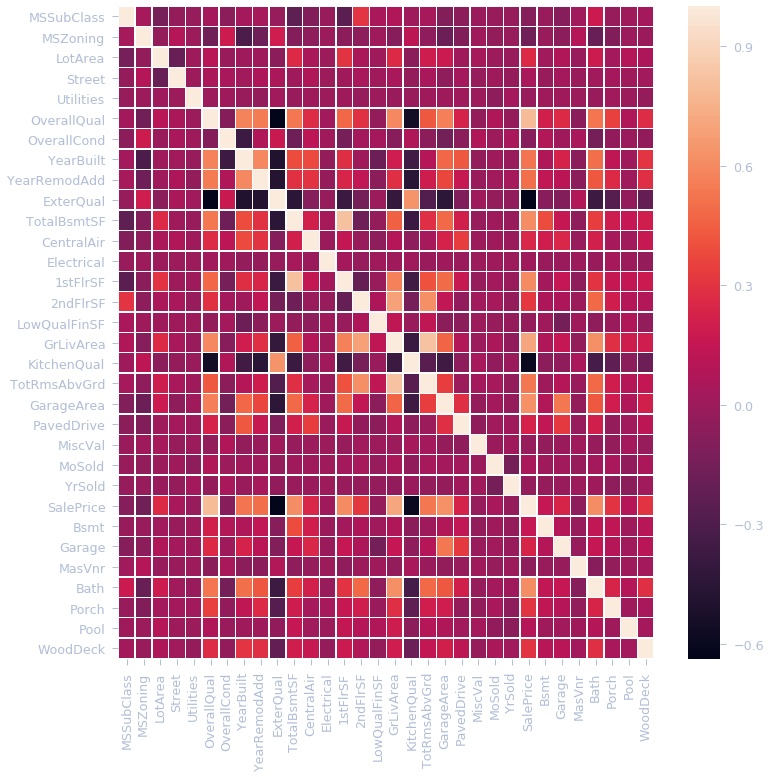

In [18]:
#finally check for high correlation to avoid multicollinearity
corr = houses.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=False,linewidth=0.4)

In [19]:
"""
Correlations seem manageble for now...
"""

'\nCorrelations seem manageble for now...\n'

## STANDARDIZE DATA  ??

## SPLIT THE DATA

In [20]:
y = houses["SalePrice"]
X = houses
X.drop("SalePrice",axis=1,inplace=True)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 29)

## MODEL PIPELINE

In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Linear Regression
for k in range(1,6):
    poly_model = make_pipeline (StandardScaler(),PolynomialFeatures(k), LinearRegression())
    model = poly_model.fit(X_train, y_train)
    #mse = mean_squared_error(y_test, y_pred)
    #print(mse)
    print(poly_model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    
#check why this error???????????????
    
# SAME PROCESS for Decision Tree and KNN

#Extract best model and configuration

#Hyperparameters tuning of the choesen model, use GRID Search if not too heavy, otherwise
#Random search

#If suspect overfitting, then feature reduction (RFE). otherwise good to go

-2.89788787015965e+20
-1.5256970936555455e+21
-913563422984789.0
-5382802217.688489


MemoryError: Unable to allocate array with shape (1168, 376992) and data type float64